# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [25]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [26]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For c_clusters= 2 The average silhoutte_score is: 0.5027144446956527
For c_clusters= 3 The average silhoutte_score is: 0.6105565451092732
For c_clusters= 4 The average silhoutte_score is: 0.6270122040179333
For c_clusters= 5 The average silhoutte_score is: 0.6115749260799671
For c_clusters= 6 The average silhoutte_score is: 0.5499388428924794
For c_clusters= 7 The average silhoutte_score is: 0.4695416652197068
For c_clusters= 8 The average silhoutte_score is: 0.4231800504179843


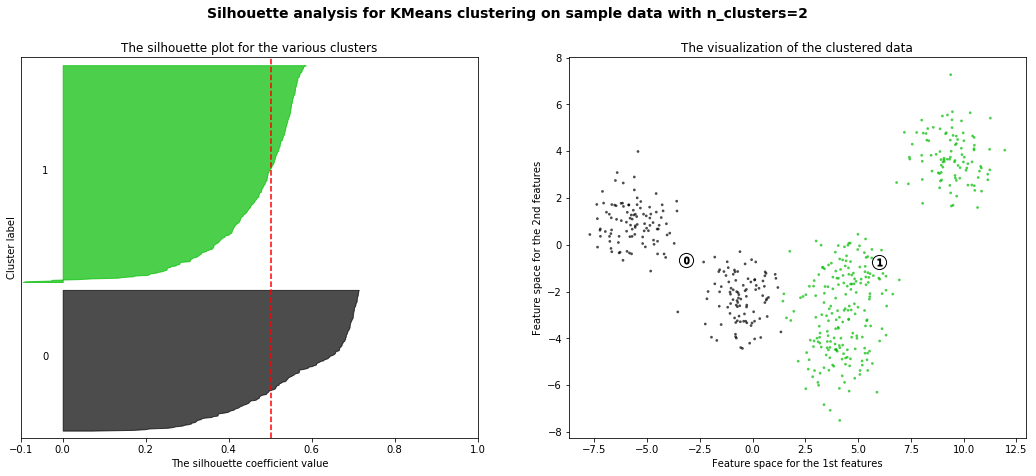

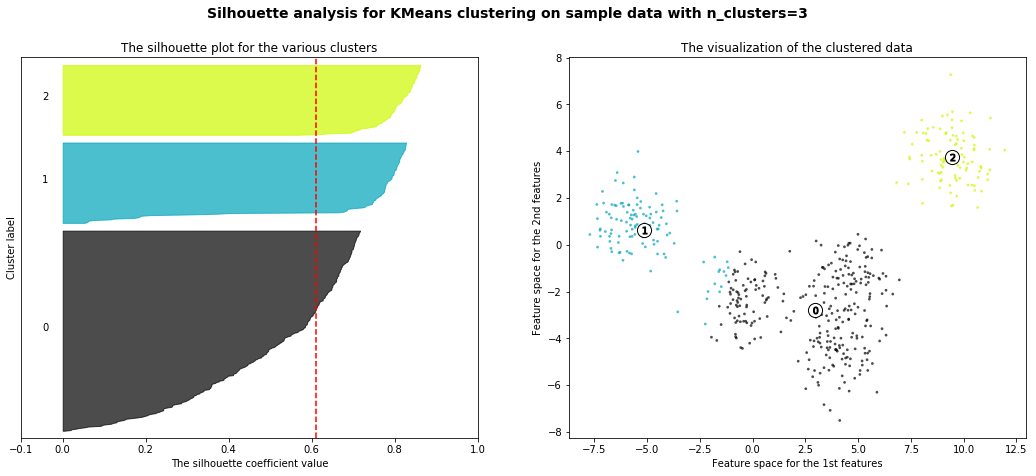

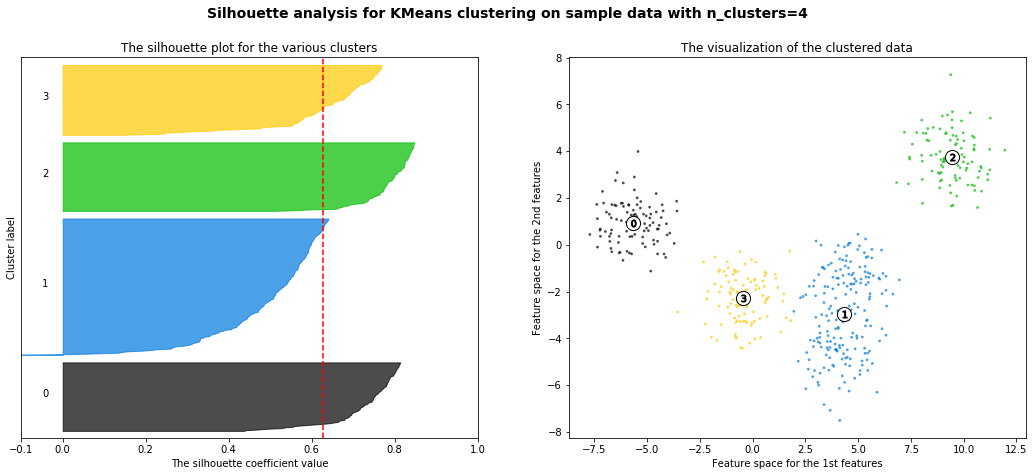

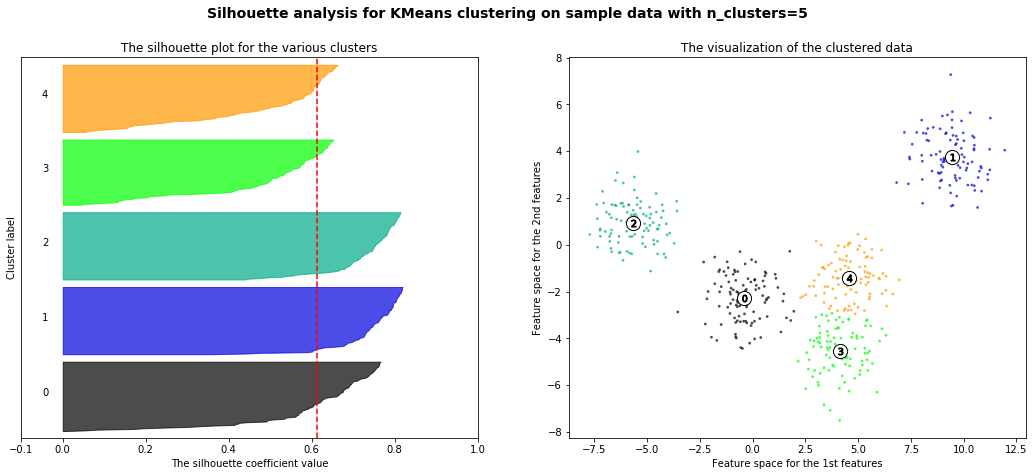

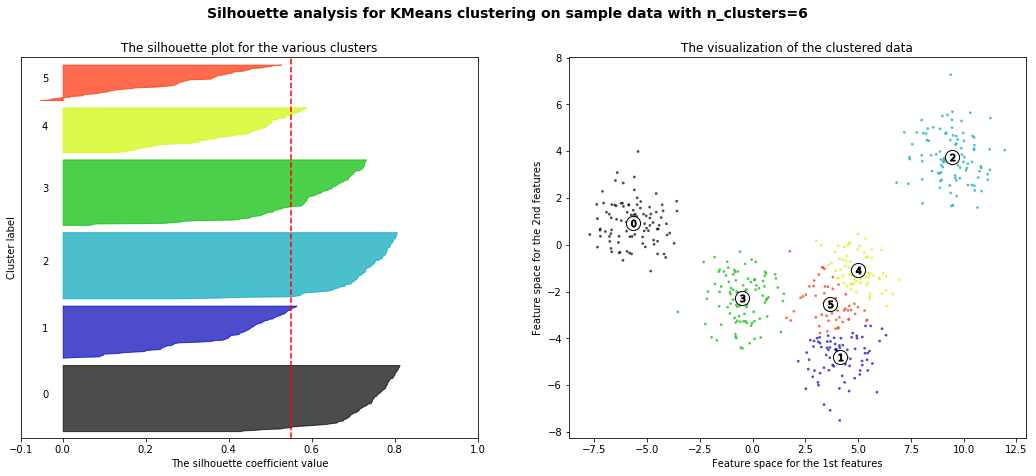

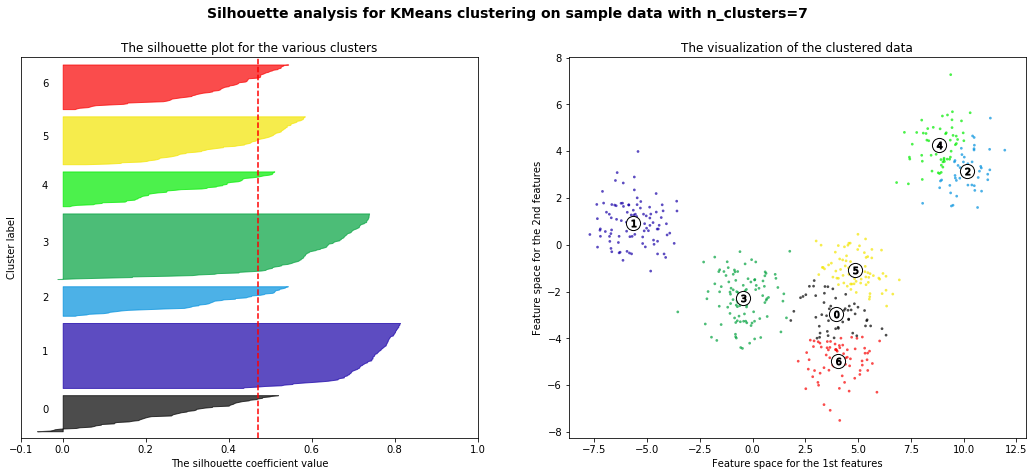

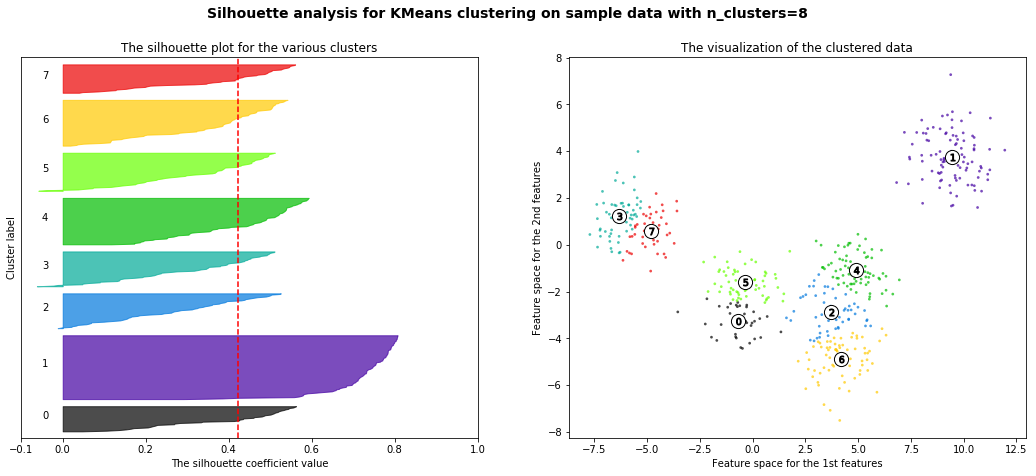

In [30]:
# 計算並繪製輪廓分析的結果
for n_clusters in range_n_clusters:
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])
    clusterer=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_label=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_label)
    print("For c_clusters=",n_clusters,"The average silhoutte_score is:",silhouette_avg)
    sample_silhouette_values=silhouette_samples(X,cluster_label)
    y_lower=10
    for i in range(n_clusters):
        ith_clusters_silhouette_values=sample_silhouette_values[cluster_label==i]
        ith_clusters_silhouette_values.sort()
        size_cluster_i=ith_clusters_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_clusters_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        y_lower=y_upper+10
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient value")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    colors=cm.nipy_spectral(cluster_label.astype(np.float)/n_clusters)
    ax2.scatter(X[:,0],X[:,1],marker=".",s=30,lw=0,alpha=0.7,edgecolor="k",c=colors)
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker="o",c="white",alpha=1,s=200,edgecolor="k")
    for i,c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker="$%d$" %i, alpha=1,s=50,edgecolor="k")
    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st features")
    ax2.set_ylabel("Feature space for the 2nd features")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters=%d" %n_clusters),fontsize=14,fontweight="bold")
plt.show()